In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [3]:
# plt.rcParams['figure.figsize'] = (8.0, 6.0)
# import seaborn as sns
# import datetime
# import h5py
# import numpy as np
# import pandas as pd
# from sklearn import pipeline

# load dataset
It is available in the release of the repo. Download the files and extract them in a `dataset` folder.

In [4]:
datafolder = './dataset/'

In [7]:
df = pd.read_csv(datafolder+'dataset.pd', index_col=0)

In [9]:
df

,finger,surface,class,filename
0,index,S3,touch,antoine_2017-03-08_10:48:36.hdf5
1,index,S3,notouch,antoine_2017-03-08_10:50:27.hdf5
2,thumb,S3,touch,antoine_2017-03-08_10:52:53.hdf5
3,thumb,S3,notouch,antoine_2017-03-08_10:54:12.hdf5
4,pinky,S3,touch,antoine_2017-03-08_10:55:51.hdf5
5,pinky,S3,notouch,antoine_2017-03-08_10:56:57.hdf5
6,index,S4,touch,antoine_2017-03-08_11:01:13.hdf5
7,index,S4,notouch,antoine_2017-03-08_11:02:24.hdf5
8,thumb,S4,touch,antoine_2017-03-08_11:03:39.hdf5
9,thumb,S4,notouch,antoine_2017-03-08_11:04:52.hdf5


The dataset includes 12 files, with 2 separated classes touch and non-touch, two different view angles and 3 finger types.

# Extract the features

In [6]:
import ml

In [7]:
pip = pipeline.Pipeline([
    ('step1', ml.Step1()),
    ('voxelgridfilter', ml.VoxelGridFilter(leaf_size=0.002)),
    ('roiextractor', ml.RoiExtractor()),
    ('fingerPlaneExtractor', ml.FingerPlaneExtractor()),
    ('featureextractor', ml.FeatureExtractor()),
])

class Dataset(object):
    def __init__(self, X, org, mat, ext):
        self.X = X
        self.org = org
        self.mat = mat
        self.ext = ext

In [8]:
def extract_feature(args):
    i, row = args

    ## X
    filename = row['filename']    
    hdf5file = h5py.File(datafolder+filename, 'r')

    x = hdf5file['data/depth']
    org = np.array(hdf5file['origin'], dtype=np.float32)
    mat = np.array(hdf5file['matrix'], dtype=np.float32)
    ext = np.array(hdf5file['extrema'], dtype=np.float32)

    t1 = datetime.datetime.now()
    data = pip.transform([Dataset(x, org, mat, ext)])

    print("classification {} for {} frames".format(datetime.datetime.now() - t1, x.shape[0]))
    return data[:,:-3]

In [9]:
from multiprocessing import Pool

pool = Pool(processes=8)
Xc = pool.map(extract_feature, df.iterrows())

/Users/antoine/anaconda/envs/touchclass/lib/python3.5/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/antoine/anaconda/envs/touchclass/lib/python3.5/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/antoine/anaconda/envs/touchclass/lib/python3.5/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/antoine/anaconda/envs/touchclass/lib/python3.5/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/antoine/anaconda/envs/touchclass/lib/python3.5/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


classification 0:01:02.665301 for 900 frames
classification 0:01:03.276317 for 900 frames
classification 0:01:03.851329 for 900 frames
classification 0:01:05.731623 for 900 frames
classification 0:01:06.227443 for 900 frames
classification 0:01:08.429051 for 900 frames
classification 0:01:09.235373 for 900 frames
classification 0:01:09.786567 for 900 frames
classification 0:00:47.585245 for 900 frames
classification 0:00:51.205500 for 900 frames
classification 0:00:52.860409 for 900 frames
classification 0:00:49.971258 for 900 frames


# compare with features.npy

In [11]:
Xc = np.array(Xc)

In [12]:
Xc.shape

(12, 900, 20)

In [7]:
Xc_ = np.load('./features.npy')

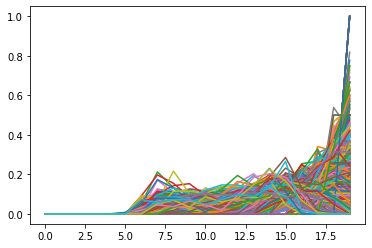

In [9]:
_=plt.plot(Xc_[1].T)

In [11]:
Xc_.shape

(12, 900, 20)

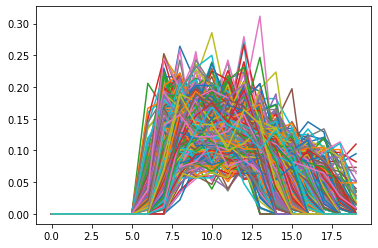

In [12]:
_=plt.plot(Xc_[0].T)

In [16]:
np.count_nonzero(np.isclose(Xc, Xc_)) / np.prod(Xc.shape)

0.9987314814814815